In [17]:
from prophet import Prophet
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime, date

plt.style.use('bmh')

In [18]:
df_1 = pd.read_csv('/kaggle/input/ethereum-highfrequency-data/ETHUSDT-1h.csv')
df_2 = pd.read_csv('/kaggle/input/ethereum-highfrequency-data/ETHUSDT-1h-1.csv')
df = pd.concat([df_1, df_2], ignore_index=True)

In [19]:
df["utc"] = df.open_time.apply(lambda x: datetime.utcfromtimestamp(x/1000))

df = df.set_index("utc")
df

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
utc,,,,,,,,,,,,
2020-12-11 00:00:00,1607644800000,558.99,560.80,545.86,548.64,49450.47617,1607648399999,2.731922e+07,25748,21434.33683,1.184264e+07,0
2020-12-11 01:00:00,1607648400000,548.59,552.07,541.31,546.09,62862.38108,1607651999999,3.429486e+07,32715,27675.76950,1.509908e+07,0
2020-12-11 02:00:00,1607652000000,546.08,547.94,542.00,542.42,52966.99588,1607655599999,2.883795e+07,23369,19729.13650,1.074282e+07,0
2020-12-11 03:00:00,1607655600000,542.44,548.48,540.13,547.27,38494.95910,1607659199999,2.094971e+07,18134,17007.07322,9.256006e+06,0
2020-12-11 04:00:00,1607659200000,547.32,548.96,543.75,545.36,25085.84669,1607662799999,1.369614e+07,11619,11096.21384,6.058920e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-19 17:00:00,1676826000000,1698.81,1702.50,1675.96,1682.56,42096.10200,1676829599999,7.110120e+07,66811,17997.00960,3.040434e+07,0
2023-02-19 18:00:00,1676829600000,1682.56,1688.10,1678.24,1685.62,14802.55620,1676833199999,2.493340e+07,27957,7104.45200,1.196763e+07,0
2023-02-19 19:00:00,1676833200000,1685.63,1690.13,1685.04,1686.01,8326.92970,1676836799999,1.405014e+07,12046,5318.41960,8.972584e+06,0


In [20]:
# 1) prepare dataframe
x = df.open
x = x.reset_index()
x.columns = ['ds','y']

# 2) build model
m = Prophet(weekly_seasonality=True, daily_seasonality=True, )
m.fit(x)

# # 3) predict
t1 = 15
df1 = m.make_future_dataframe(periods=t1, freq='h')
df_out = m.predict(df1)
df_out

21:12:37 - cmdstanpy - INFO - Chain [1] start processing
21:13:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-11 00:00:00,3.647322,372.626596,764.436507,3.647322,3.647322,580.623776,580.623776,580.623776,1.912011,...,4.056656,4.056656,4.056656,574.655110,574.655110,574.655110,0.0,0.0,0.0,584.271098
1,2020-12-11 01:00:00,3.794848,372.051953,775.652360,3.794848,3.794848,579.419354,579.419354,579.419354,1.499821,...,3.281982,3.281982,3.281982,574.637551,574.637551,574.637551,0.0,0.0,0.0,583.214202
2,2020-12-11 02:00:00,3.942373,378.679047,785.115119,3.942373,3.942373,577.423983,577.423983,577.423983,0.298579,...,2.506630,2.506630,2.506630,574.618774,574.618774,574.618774,0.0,0.0,0.0,581.366356
3,2020-12-11 03:00:00,4.089898,372.304839,786.490275,4.089898,4.089898,575.245023,575.245023,575.245023,-1.089380,...,1.735608,1.735608,1.735608,574.598796,574.598796,574.598796,0.0,0.0,0.0,579.334921
4,2020-12-11 04:00:00,4.237423,375.000380,785.344813,4.237423,4.237423,573.711061,573.711061,573.711061,-1.840426,...,0.973854,0.973854,0.973854,574.577633,574.577633,574.577633,0.0,0.0,0.0,577.948484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,2023-02-20 08:00:00,171.407875,1291.644593,1692.218790,171.407875,171.407875,1322.116179,1322.116179,1322.116179,0.268126,...,-6.103479,-6.103479,-6.103479,1327.951532,1327.951532,1327.951532,0.0,0.0,0.0,1493.524054
19215,2023-02-20 09:00:00,171.116188,1283.078775,1692.437544,171.116188,171.116188,1320.473793,1320.473793,1320.473793,-0.464902,...,-5.924967,-5.924967,-5.924967,1326.863662,1326.863662,1326.863662,0.0,0.0,0.0,1491.589981
19216,2023-02-20 10:00:00,170.824501,1284.635730,1689.345714,170.824501,170.824501,1318.714989,1318.714989,1318.714989,-1.328238,...,-5.728246,-5.728246,-5.728246,1325.771474,1325.771474,1325.771474,0.0,0.0,0.0,1489.539491
19217,2023-02-20 11:00:00,170.532815,1273.869477,1698.309690,170.532815,170.532815,1317.503558,1317.503558,1317.503558,-1.656365,...,-5.515072,-5.515072,-5.515072,1324.674995,1324.674995,1324.674995,0.0,0.0,0.0,1488.036373


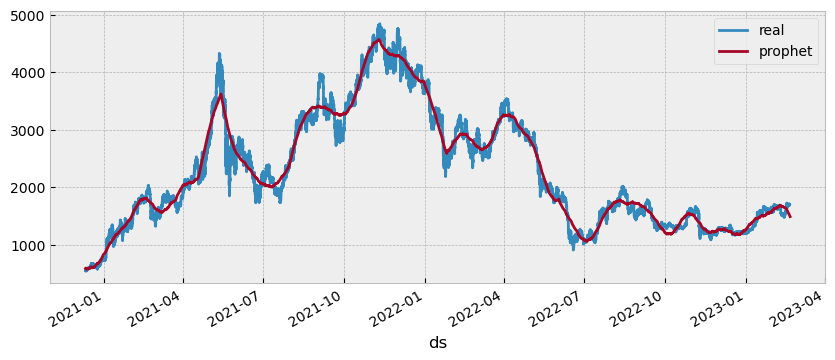

In [21]:
# 4) plotting
_ = x.set_index('ds').plot(figsize = (10,4))
_ = df_out.set_index('ds')['yhat'].plot()
_ = _.legend(['real','prophet'])

In [44]:
x_out = df_out[-12:]["yhat"]

In [45]:
x_out

19207    1503.658172
19208    1501.126442
19209    1498.428281
19210    1496.387159
19211    1495.405414
19212    1495.126653
19213    1494.714802
19214    1493.524054
19215    1491.589981
19216    1489.539491
19217    1488.036373
19218    1487.267654
Name: yhat, dtype: float64

In [46]:
x_out = str(list(x_out.map(lambda x: round(x,3)))).replace(' ','')

In [47]:
x_out

'[1503.658,1501.126,1498.428,1496.387,1495.405,1495.127,1494.715,1493.524,1491.59,1489.539,1488.036,1487.268]'

In [48]:
filename = 'eth_predict.csv'
fout = open(filename, 'w')
fout.write(x_out)
fout.close()